In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
import matplotlib.pyplot as plt

In [23]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

In [24]:
#Build the Deep Neural Network Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32),         
    GlobalAveragePooling1D(),                           
    Dense(1, activation='sigmoid')                     
])

In [25]:
#Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
#Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6261 - loss: 0.6675 - val_accuracy: 0.7767 - val_loss: 0.5461
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8157 - loss: 0.4949 - val_accuracy: 0.8352 - val_loss: 0.4162
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8596 - loss: 0.3808 - val_accuracy: 0.8523 - val_loss: 0.3598
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8751 - loss: 0.3265 - val_accuracy: 0.8647 - val_loss: 0.3291
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8936 - loss: 0.2862 - val_accuracy: 0.8714 - val_loss: 0.3106
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9032 - loss: 0.2620 - val_accuracy: 0.8730 - val_loss: 0.3053
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9093 - loss: 0.2449 - val_accuracy: 0.8776 - val_loss: 0.2938
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9199 - loss: 0.2205 - val_accurac

In [27]:
#Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8774 - loss: 0.2925
Test Loss: 0.2940705716609955
Test Accuracy: 0.8759199976921082


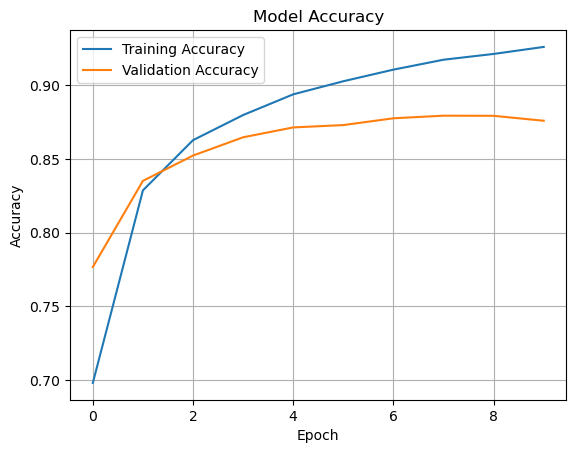

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()